# MCP Support with LangDB

This notebook demonstrates how to use the LangDB client with different Model Control Plane (MCP) scenarios:
1. Exa Web Search
2. GitHub Integration

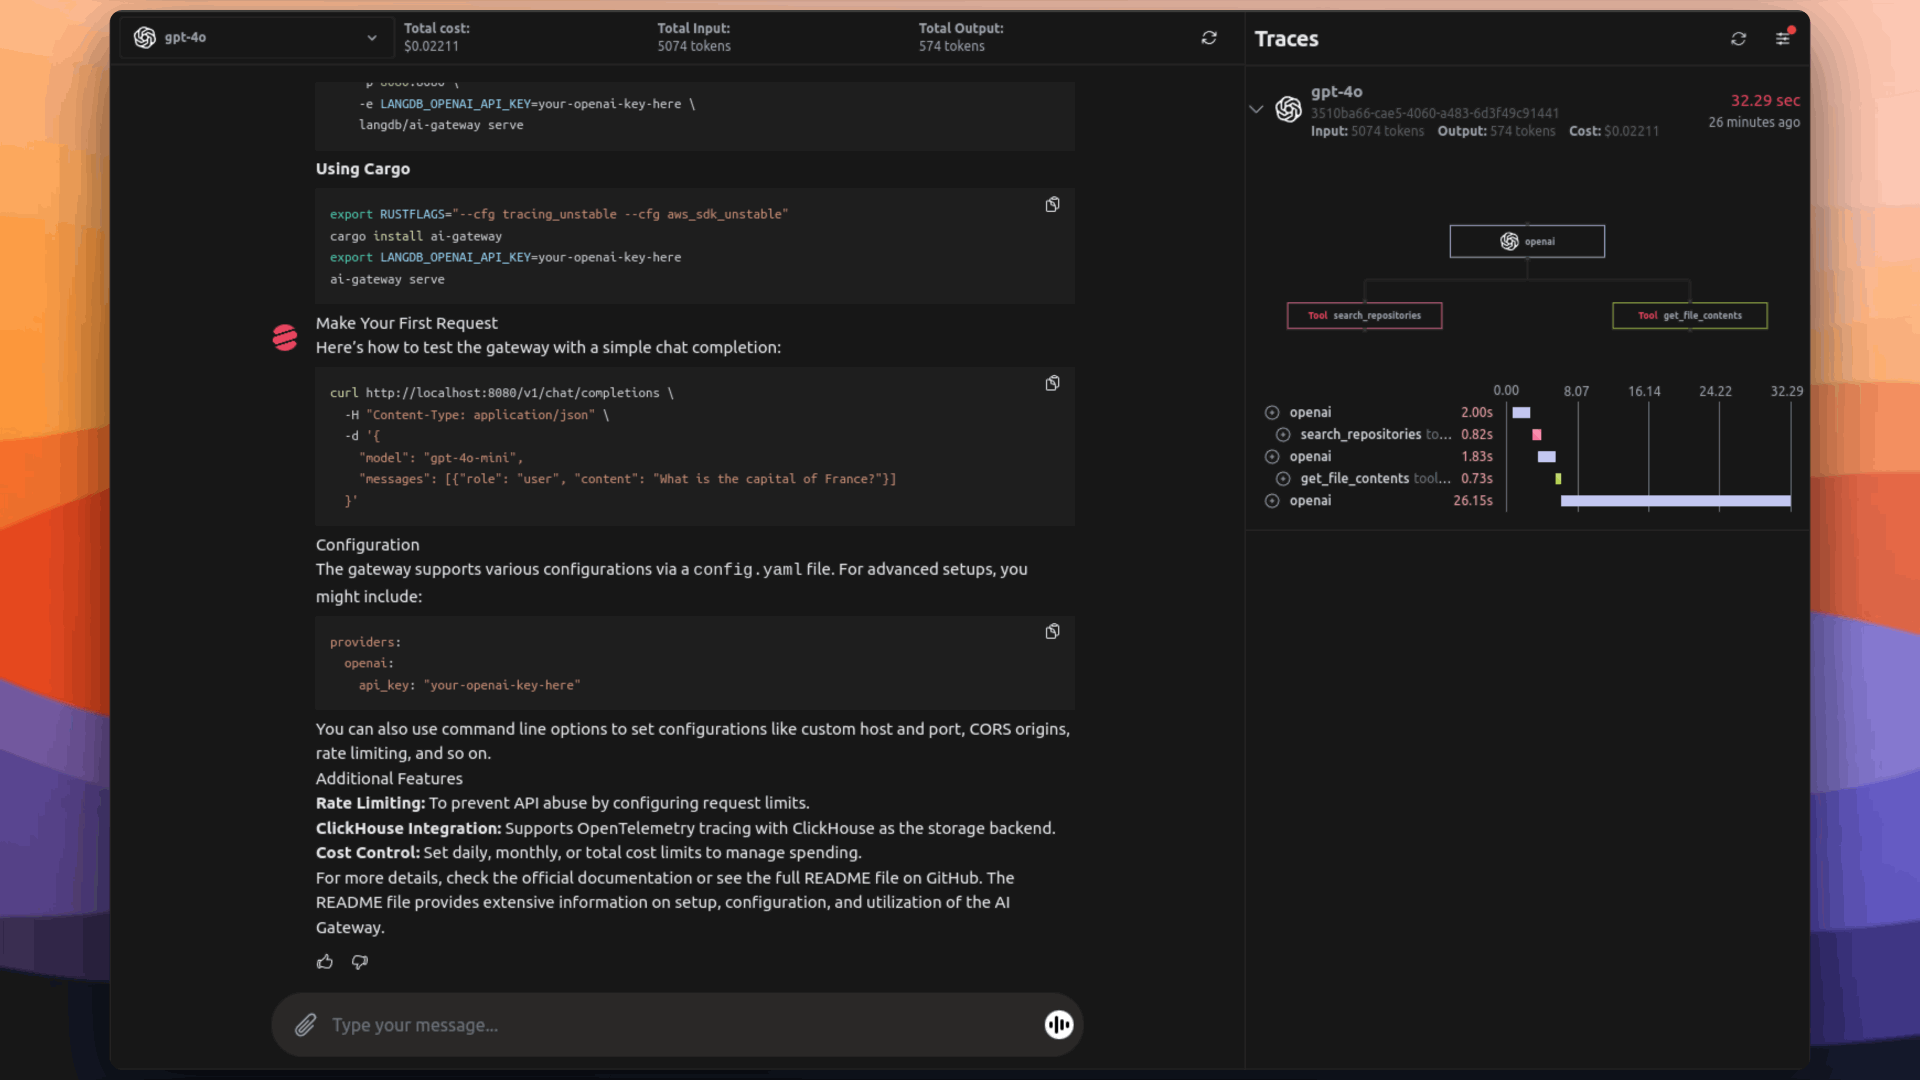

In [2]:
from pylangdb import LangDb
from dotenv import load_dotenv
import os
import base64
import json
from urllib.parse import quote

# Load environment variables
load_dotenv()

True

In [4]:
def urlEncode(data_dict):
    """Convert dictionary to base64 and then URL encode it"""
    return quote(base64.b64encode(json.dumps(data_dict).encode()).decode())

In [3]:
# Initialize LangDB client
client = LangDb(
    api_key=os.getenv("LANGDB_API_KEY"), base_url=os.getenv("LANGDB_API_URL")
)

## Scenario 1: Exa Web Search Integration

In [5]:
# Configure Exa MCP
exa_config = {"exaApiKey": os.getenv("EXA_API_KEY")}

exa_config_str = urlEncode(exa_config)
exa_web_socket_url = (
    "wss://app-1f5f3f06-22ad-4c22-ade1-aebdd9b28c20-5u5fdnfupa-uc.a.run.app/ws"
)

extra_body_exa = {
    "mcp_servers": [
        {"server_url": f"{exa_web_socket_url}?config={exa_config_str}", "type": "ws"}
    ]
}

In [17]:
# Test Exa Web Search
response_exa = client.completion(
    model="gpt-4o",
    messages=[{"role": "user", "content": "What is LangDB AI Gateway"}],
    extra_body=extra_body_exa,
    temperature=0.7,
    max_tokens=1000,
)

print("Exa Web Search Response:")
print(response_exa["content"])

Exa Web Search Response:
LangDB AI Gateway is an enterprise solution designed to manage, optimize, and secure AI interactions across multiple language models (LLMs). Here are some key features and functionalities of LangDB AI Gateway:

1. **Unified Interface**: It provides a unified interface to all LLMs using an OpenAI-compatible API format, allowing seamless integration with existing systems.

2. **Cost Optimization**: The gateway offers advanced cost management features, including detailed usage analytics, cost tracking, and the ability to set spending limits. Smart routing can lead to significant cost savings by directing requests to the most efficient model.

3. **High Performance**: Built in Rust, the gateway is optimized for speed and reliability. It supports integration with various frameworks and provides features like advanced routing, load balancing, and failover.

4. **Security and Governance**: LangDB AI Gateway includes features for data control, logging, and tracing, ens

## Scenario 2: GitHub Integration

In [6]:
# Configure GitHub MCP
github_config = {"githubPersonalAccessToken": os.getenv("GITHUB_PERSONAL_ACCESS_TOKEN")}

github_config_str = urlEncode(github_config)
github_web_socket_url = (
    "wss://app-6a371696-6f71-49a2-b977-9521e125d625-5u5fdnfupa-uc.a.run.app/ws"
)

extra_body_github = {
    "mcp_servers": [
        {
            "server_url": f"{github_web_socket_url}?config={github_config_str}",
            "type": "ws",
        }
    ]
}

In [16]:
# Test GitHub Integration
response_github = client.completion(
    model="gpt-4o",
    messages=[{"role": "user", "content": "Tell me how to use langdb/ai-gateway repo"}],
    extra_body=extra_body_github,
)

print("GitHub Integration Response:")
print(response_github["content"])

GitHub Integration Response:
The `langdb/ai-gateway` repository provides an open-source Enterprise AI Gateway built in Rust. It offers a unified interface to all Large Language Models (LLMs) using the OpenAI API format. Here's how you can use it:

### Key Features
- **High Performance**: Built in Rust for speed and reliability, with seamless integration to any platform.
- **Enterprise Ready**: Features like usage analytics, cost control, routing, load balancing, and failover.
- **Data Control**: Full ownership of LLM usage data, including detailed logging and tracing.

### Getting Started

#### 1. Installation
You have two options for installation:

- **Using Docker (Recommended)**
  ```bash
  docker run -it \
      -p 8080:8080 \
      -e LANGDB_OPENAI_API_KEY=your-openai-key-here \
      langdb/ai-gateway serve
  ```

- **Using Cargo**
  ```bash
  export RUSTFLAGS="--cfg tracing_unstable --cfg aws_sdk_unstable"
  
  cargo install ai-gateway
  
  export LANGDB_OPENAI_API_KEY=your-open

## Combined Scenario (Both MCPs)

In [8]:
# Configure both MCPs
extra_body_combined = {
    "mcp_servers": [
        {"server_url": f"{exa_web_socket_url}?config={exa_config_str}", "type": "ws"},
        {
            "server_url": f"{github_web_socket_url}?config={github_config_str}",
            "type": "ws",
        },
    ]
}

In [12]:
# Test Combined Integration
response_combined = client.completion(
    model="gpt-4o",
    messages=[
        {
            "role": "user",
            "content": "Tell me about langdb.ai from their website and how to use it with LangDB/ai-gateway repo. Tell me step by step",
        }
    ],
    extra_body=extra_body_combined,
)

print("Combined Integration Response:")
print(response_combined["content"])

Combined Integration Response:
**LangDB.ai Overview:**

LangDB.ai is a platform designed to provide a simplified LLM management system that offers seamless connections to multiple large language models (LLMs) with just a single line of code. It includes features for monitoring and optimizing expenses, routing requests to the most appropriate models, and ensuring cost efficiency. The platform supports major LLMs, Hugging Face, and open-source models, allowing easy switching and up-to-date technology access. Key features include OpenAI-compatible APIs, smart model routing, comprehensive cost management, and intelligent caching for optimized performance.

**How to Use LangDB with the LangDB/ai-gateway Repo:**

1. **Prerequisites:**
   - Create a LangDB.ai account and generate an API key.
   - Basic understanding of the repository's architecture and the following tools might be necessary: Docker, Curl.

2. **Installation:**
   - Ensure you have Docker installed on your system.

3. **Runnin